In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: IT_PAGER=cat: Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [3]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\3.concertriccir2.csv",header = None)

In [4]:
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
df.shape

(500, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<AxesSubplot:xlabel='0', ylabel='1'>

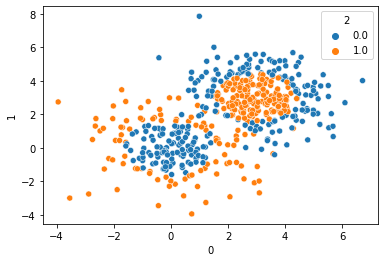

In [7]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## Split the data into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [9]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## Build the neural networks

In [32]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=2))

model.add(Dense(75,activation='relu'))

model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               300       
                                                                 
 dense_13 (Dense)            (None, 75)                7575      
                                                                 
 dense_14 (Dense)            (None, 50)                3800      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11,726
Trainable params: 11,726
Non-trainable params: 0
_________________________________________________________________


In [44]:
# complie model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,batch_size=10,epochs=500,validation_split=0.2)

Epoch 1/500


C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


36/36 [==============================] - 1s 19ms/step - loss: 0.1952 - accuracy: 0.9139 - val_loss: 0.2076 - val_accuracy: 0.9333
Epoch 2/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9306 - val_loss: 0.2403 - val_accuracy: 0.8889
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9222 - val_loss: 0.2247 - val_accuracy: 0.9000
Epoch 4/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.9333 - val_loss: 0.2184 - val_accuracy: 0.9000
Epoch 5/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9389 - val_loss: 0.2240 - val_accuracy: 0.9222
Epoch 6/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9389 - val_loss: 0.2617 - val_accuracy: 0.8778
Epoch 7/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9194 - val_loss: 0.2091 - val_accuracy: 0.9333
Epoch 8/500
36/36 [=====

Epoch 59/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1594 - accuracy: 0.9389 - val_loss: 0.1894 - val_accuracy: 0.9556
Epoch 60/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1661 - accuracy: 0.9278 - val_loss: 0.1980 - val_accuracy: 0.9111
Epoch 61/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9278 - val_loss: 0.2509 - val_accuracy: 0.8778
Epoch 62/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.9167 - val_loss: 0.2041 - val_accuracy: 0.9333
Epoch 63/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9528 - val_loss: 0.2485 - val_accuracy: 0.8889
Epoch 64/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9278 - val_loss: 0.1925 - val_accuracy: 0.9111
Epoch 65/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9194 - val_loss: 0.1889 - val_accuracy: 0.9111
Epoch 

36/36 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9389 - val_loss: 0.1720 - val_accuracy: 0.9222
Epoch 174/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9333 - val_loss: 0.1963 - val_accuracy: 0.9111
Epoch 175/500
36/36 [==============================] - 0s 5ms/step - loss: 0.1467 - accuracy: 0.9389 - val_loss: 0.1869 - val_accuracy: 0.9000
Epoch 176/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9500 - val_loss: 0.2123 - val_accuracy: 0.8889
Epoch 177/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.9444 - val_loss: 0.2067 - val_accuracy: 0.8778
Epoch 178/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.9333 - val_loss: 0.1939 - val_accuracy: 0.9111
Epoch 179/500
36/36 [==============================] - 0s 5ms/step - loss: 0.1389 - accuracy: 0.9333 - val_loss: 0.1797 - val_accuracy: 0.9222
Epoch 180/500

36/36 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9444 - val_loss: 0.1714 - val_accuracy: 0.9333
Epoch 288/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9556 - val_loss: 0.1710 - val_accuracy: 0.9222
Epoch 289/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9444 - val_loss: 0.1689 - val_accuracy: 0.9333
Epoch 290/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.9306 - val_loss: 0.2072 - val_accuracy: 0.9111
Epoch 291/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9417 - val_loss: 0.1695 - val_accuracy: 0.9333
Epoch 292/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1283 - accuracy: 0.9389 - val_loss: 0.1709 - val_accuracy: 0.9333
Epoch 293/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.9333 - val_loss: 0.1576 - val_accuracy: 0.9444
Epoch 294/500

36/36 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.9417 - val_loss: 0.2040 - val_accuracy: 0.9000
Epoch 402/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9472 - val_loss: 0.1732 - val_accuracy: 0.9222
Epoch 403/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1417 - accuracy: 0.9250 - val_loss: 0.1872 - val_accuracy: 0.9222
Epoch 404/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9278 - val_loss: 0.1533 - val_accuracy: 0.9444
Epoch 405/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 0.9472 - val_loss: 0.1644 - val_accuracy: 0.9444
Epoch 406/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.9417 - val_loss: 0.1681 - val_accuracy: 0.9333
Epoch 407/500
36/36 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9444 - val_loss: 0.2348 - val_accuracy: 0.9222
Epoch 408/500

In [46]:
y_cap= model.predict(X_test_trans)

2/2 [==============================] - 0s 0s/step


In [47]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.5

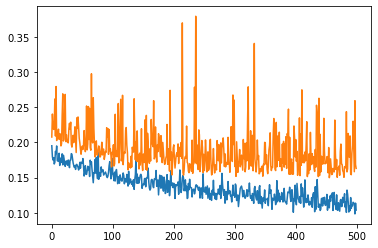

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

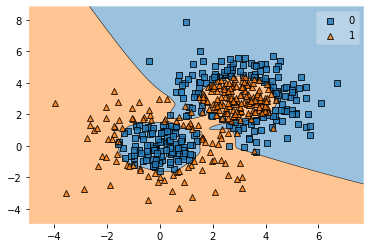

In [50]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)